# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import add
%matplotlib inline

# Read The Data

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\CStudy(python)\C ML\Heart Rate Risk\Dataset Heart Risk.xlsx - Sheet1.csv')
df.head()

,P_ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartRisk
0,1211,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1212,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1213,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1214,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1215,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(3698, 17)

In [4]:
df.drop(['education', 'P_ID'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartRisk
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Exploratory Data Analysis

## Missing variables

In [5]:
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 13.03%


In [6]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,345,9.329367
BPMeds,46,1.243916
totChol,46,1.243916
cigsPerDay,25,0.676041
BMI,19,0.513791
heartRate,1,0.027042


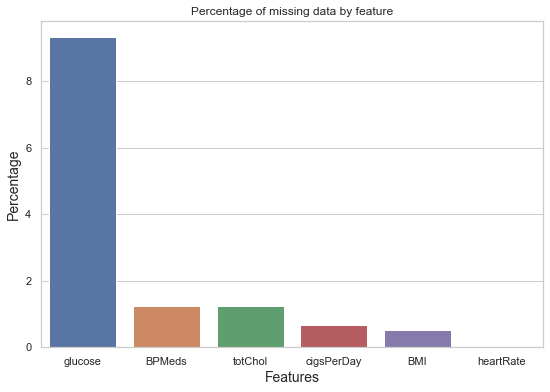

In [7]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [8]:
df.dropna(axis=0, inplace=True)
df.shape

(3264, 15)

## Data Distribution

C:\Users\Dell\AppData\Local\Temp/ipykernel_16504/3716091685.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


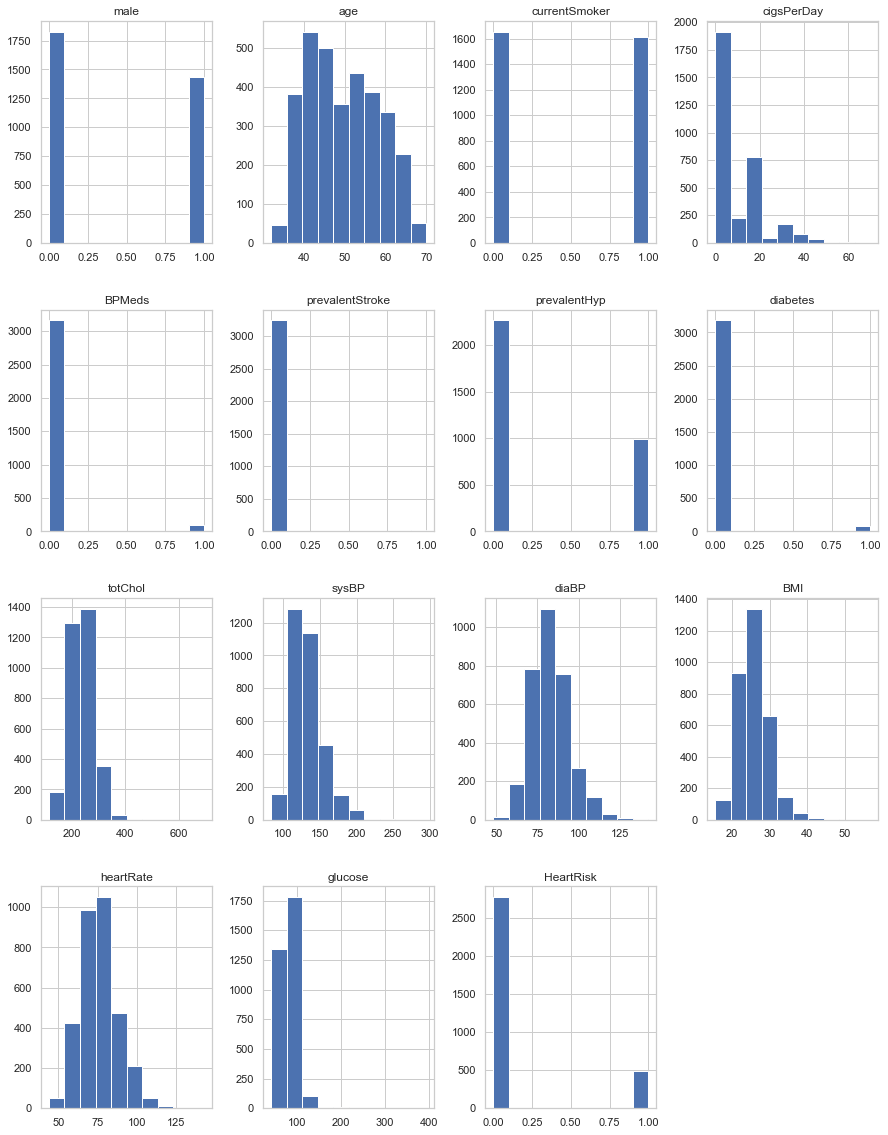

In [9]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

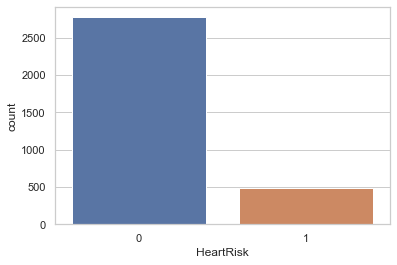

In [10]:
sns.countplot(x='HeartRisk',data=df)
plt.show()
cases = df.HeartRisk.value_counts()

In [11]:
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

There are 2772 patients without heart disease and 492 patients with the disease


## Number of people who have disease vs age

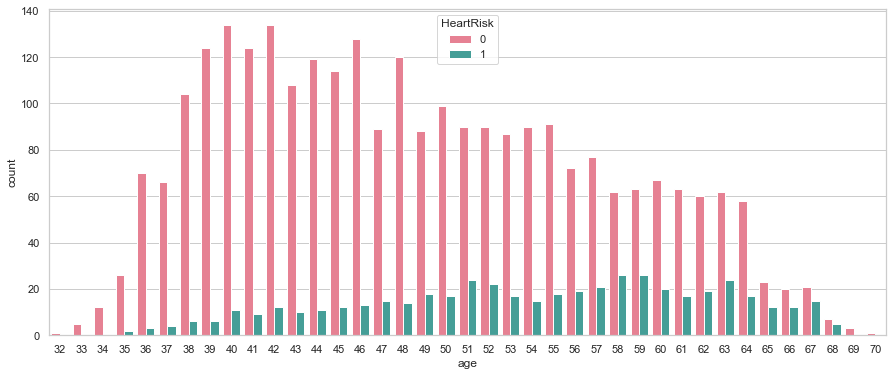

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',hue  = 'HeartRisk',data = df,palette='husl')
plt.show()

## Correlation Heat map

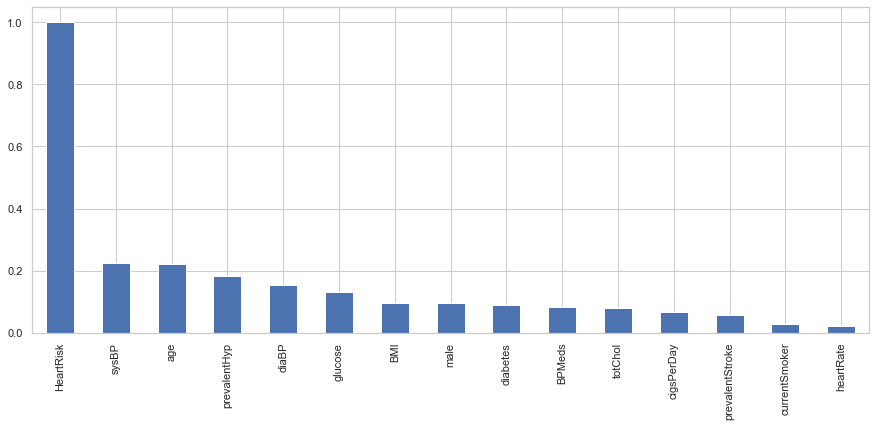

In [13]:
plt.figure(figsize=(15,6))
bars = df.corr()['HeartRisk'].sort_values(ascending=False).plot(kind='bar')

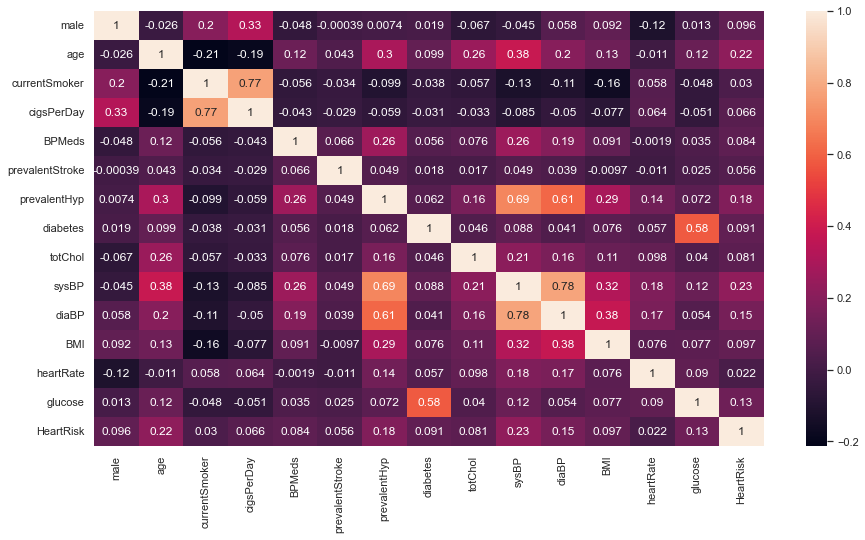

In [14]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(df.corr(), annot=True)

Immediately, we can see that there’s a strong correlation between P_ID and HeartRate

Similarly to the correlation matrix, I want to create a pairplot of my variables so that I can understand the relationships between my variables even more.

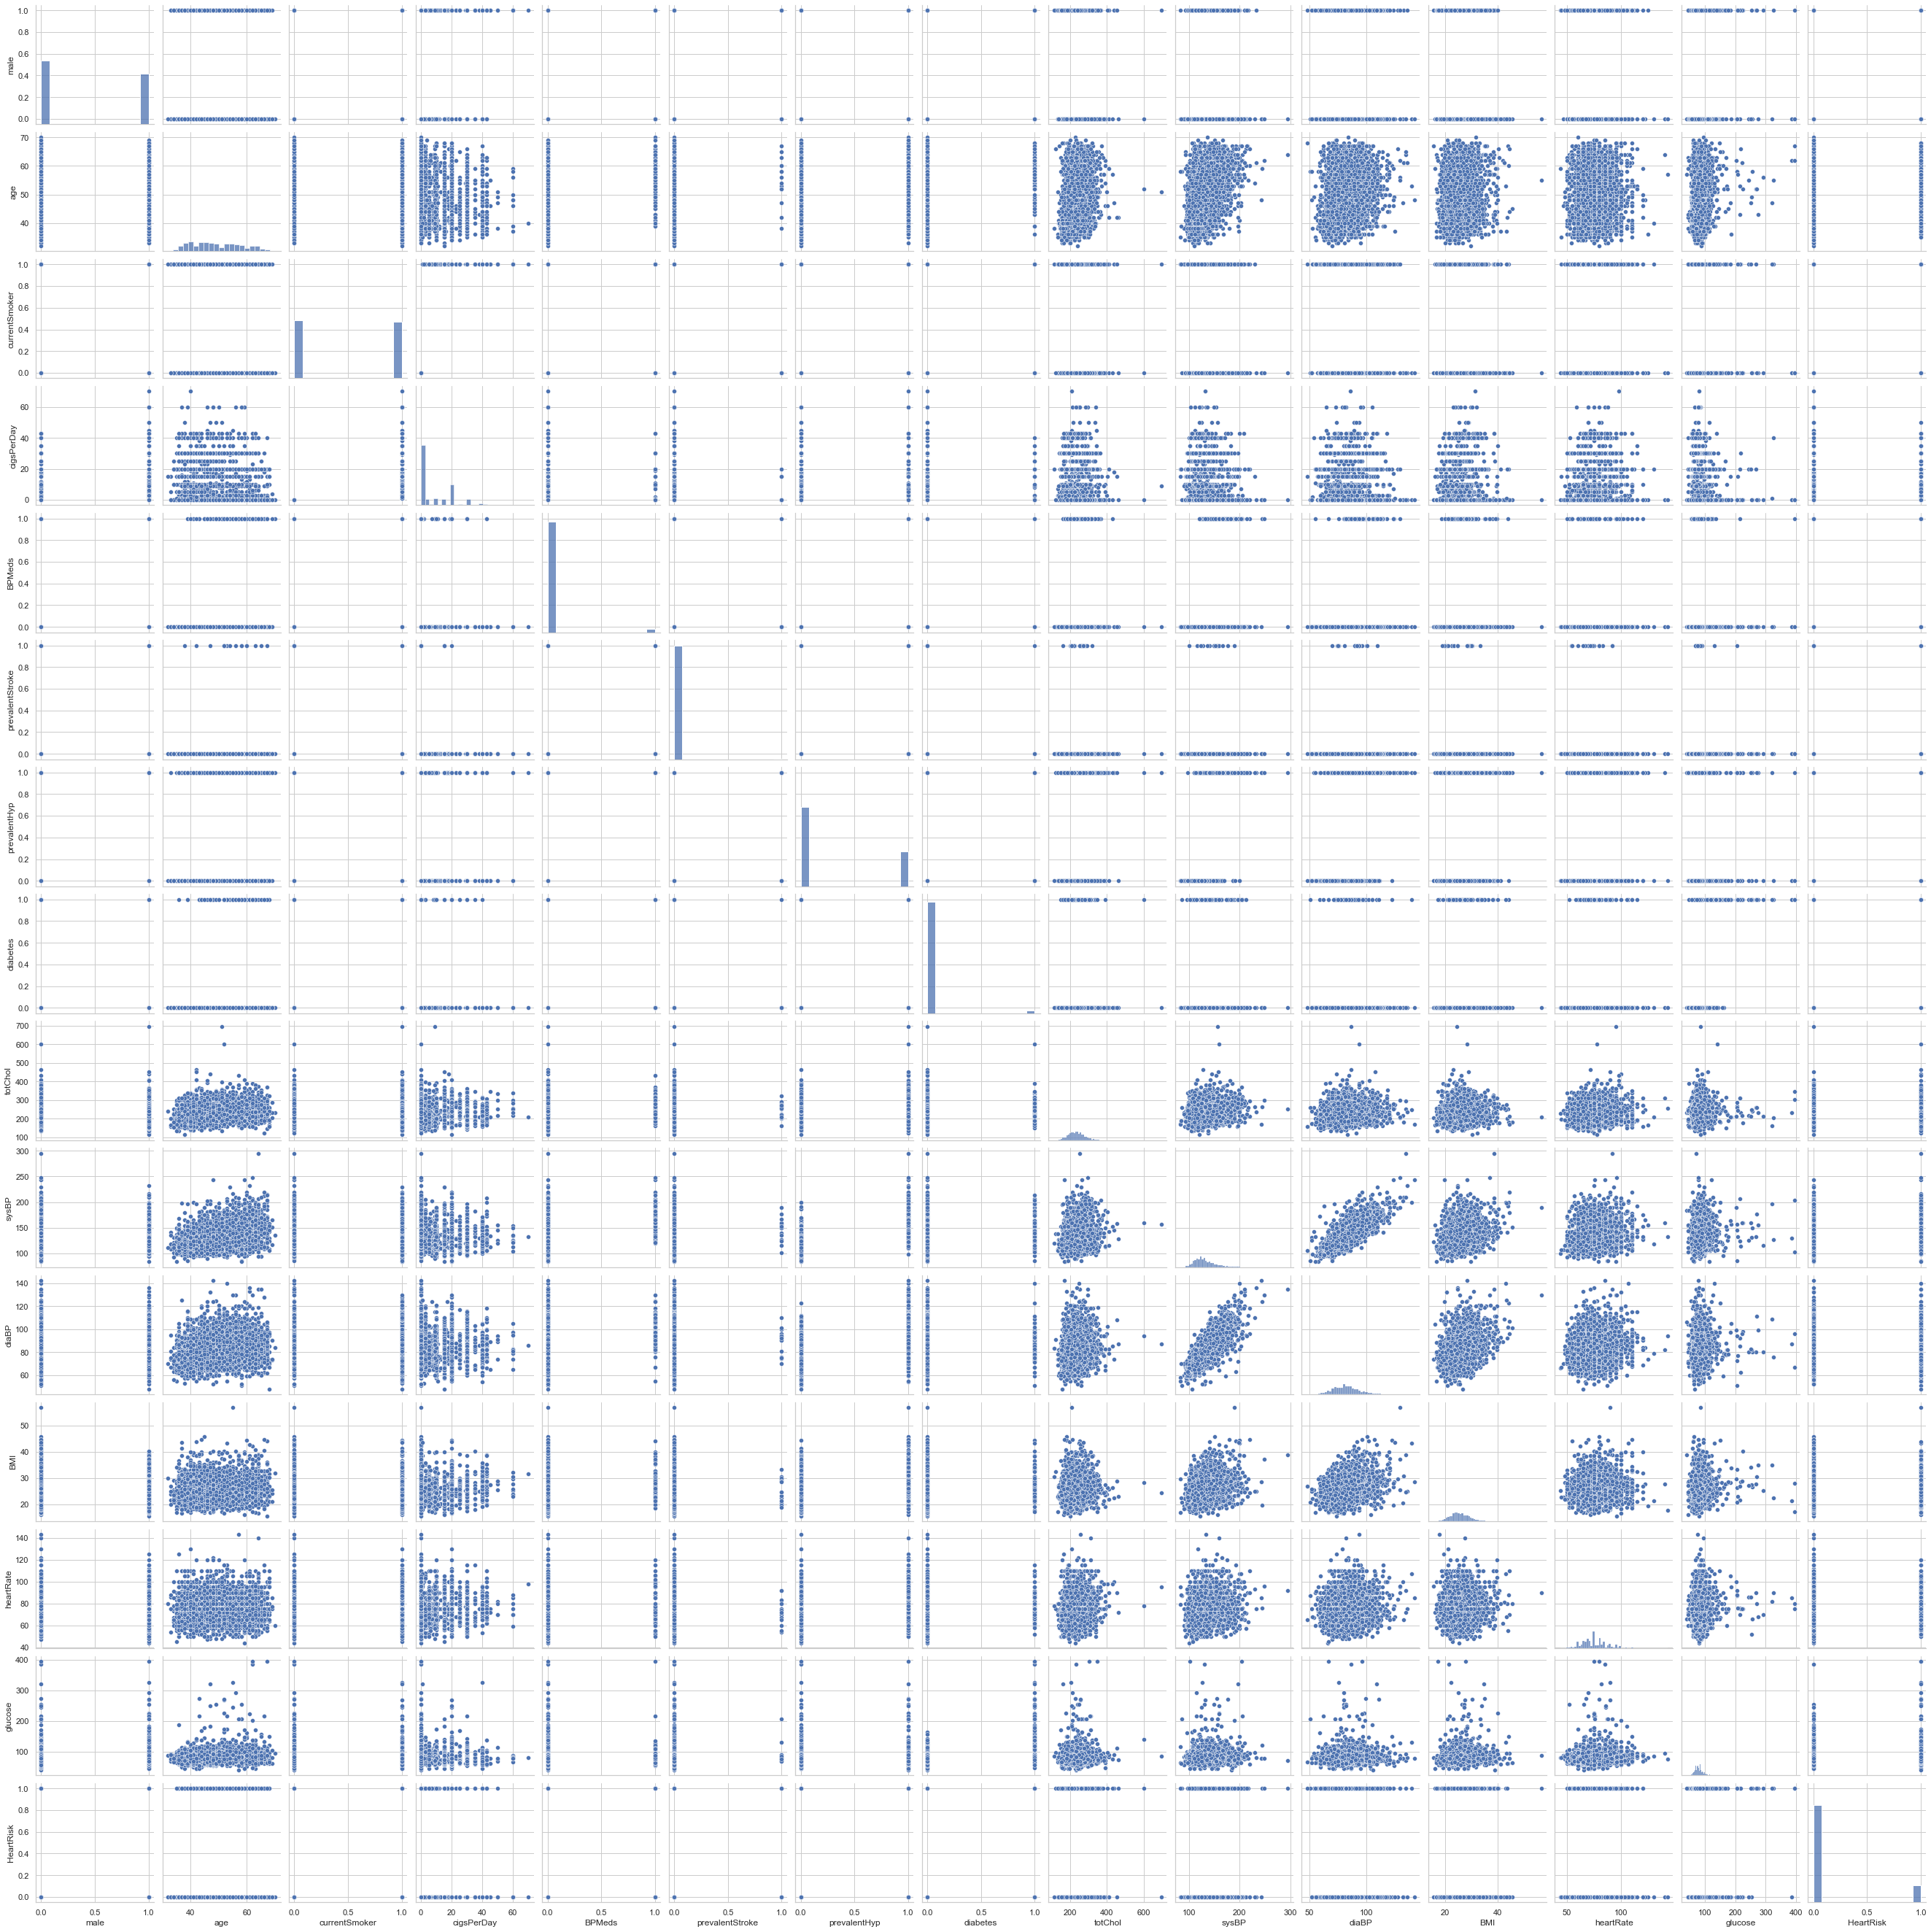

In [15]:
sns.pairplot(df)

# Feature Selection

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from boruta import BorutaPy

In [17]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
feat_selector.fit(x, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=31, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1EA44331840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1EA44331840, verbose=2)

In [18]:
most_important = df.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP', 'BMI']

In [19]:
top_features = df.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age',
 'cigsPerDay',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

## Statistics on the top features

In [20]:
import statsmodels.api as sm

In [21]:
X_top = df[top_features]
y = df['HeartRisk']

In [22]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.400718
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HeartRisk   No. Observations:                 3264
Model:                          Logit   Df Residuals:                     3255
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                 0.05487
Time:                        12:02:37   Log-Likelihood:                -1307.9
converged:                       True   LL-Null:                       -1383.9
Covariance Type:            nonrobust   LLR p-value:                 7.978e-29
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.0261      0.006      4.229      0.000       0.014       0.038
cigsPerDay       0.0213      0.004      5.238      0.000       0.013       0.029
prevalentHyp     1.0846      0.128      8.457      0.000       0.833       1.336
totChol         -0.0025      0.001     -2.136      0.033      -0.005      -0.000
sysBP            0.0129      0.004      3.294      0.001       0.005       0.020
diaBP           -0.0304      0.006     -4.865      0.000      -0.043      -0.018
BMI             -0.0286      0.013     -2.234      0.025      -0.054      -0.004
heartRate       -0.0273      0.004     -6.535      0.000      -0.035      -0.019
glucose          0.0065      0.002      3.408      0.001       0.003       0.010
================================================================================
"""

In [23]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                    5%       95%  Odds Ratio
age           1.014127  1.039002    1.026489
cigsPerDay    1.013431  1.029730    1.021548
prevalentHyp  2.300754  3.803631    2.958246
totChol       0.995298  0.999797    0.997545
sysBP         1.005219  1.020708    1.012934
diaBP         0.958276  0.982022    0.970076
BMI           0.947680  0.996497    0.971782
heartRate     0.965164  0.981085    0.973092
glucose       1.002784  1.010357    1.006563


# Models and predictions

## SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [25]:
X = df[top_features]
y = df.iloc[:,-1]

In [26]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [27]:
print(num_before, num_after)

{0: 2772, 1: 492} {0: 2771, 1: 2217}


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


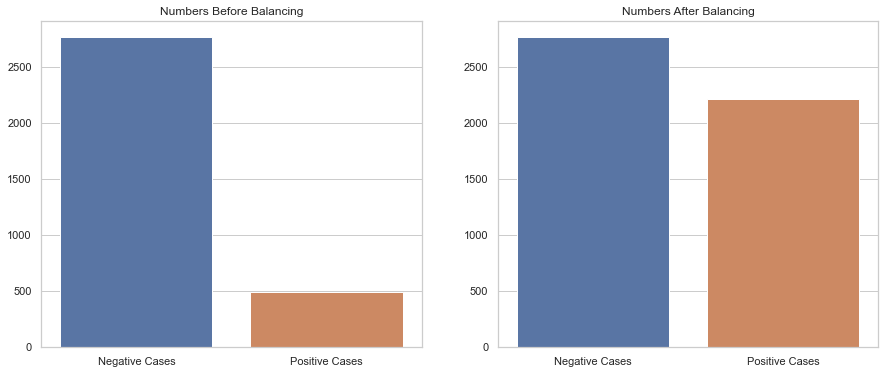

In [28]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

## Splitting data to Training and Testing set

In [30]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'cigsPerDay', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'HeartRisk']
new_data.head()

,age,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartRisk
0,67,2.0,0,144.0,113.0,62.0,22.90,58.0,69.0,0
1,45,0.0,0,175.0,114.0,74.0,30.53,72.0,105.0,0
2,46,5.0,0,240.0,125.0,74.0,22.89,87.0,76.0,0
3,42,0.0,0,190.0,121.0,85.5,22.19,87.0,85.0,0
4,52,10.0,0,246.0,113.5,66.5,19.47,85.0,60.0,0


In [31]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,67,2.0,0,144.0,113.0,62.0,22.90,58.0,69.0
1,45,0.0,0,175.0,114.0,74.0,30.53,72.0,105.0
2,46,5.0,0,240.0,125.0,74.0,22.89,87.0,76.0
3,42,0.0,0,190.0,121.0,85.5,22.19,87.0,85.0
4,52,10.0,0,246.0,113.5,66.5,19.47,85.0,60.0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## Models

### Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [35]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [36]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [37]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [38]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 68.14%


<AxesSubplot:>

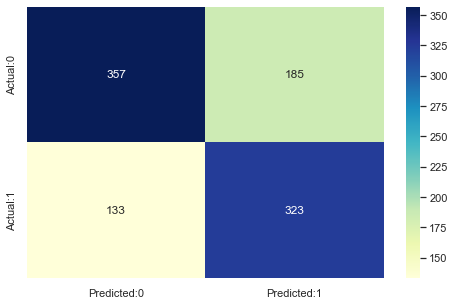

In [39]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [40]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       542
           1       0.64      0.71      0.67       456

    accuracy                           0.68       998
   macro avg       0.68      0.68      0.68       998
weighted avg       0.69      0.68      0.68       998



### k-Nearest Neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [42]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [43]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [44]:
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 84.67%


<AxesSubplot:>

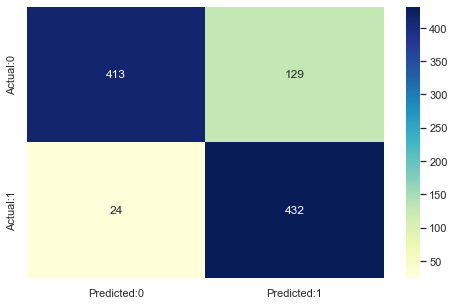

In [45]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [46]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       542
           1       0.77      0.95      0.85       456

    accuracy                           0.85       998
   macro avg       0.86      0.85      0.85       998
weighted avg       0.87      0.85      0.85       998



### Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)


# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [48]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7}

In [49]:
# predictions
tree_predict = tree_clf.predict(X_test)

#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 72.34%


<AxesSubplot:>

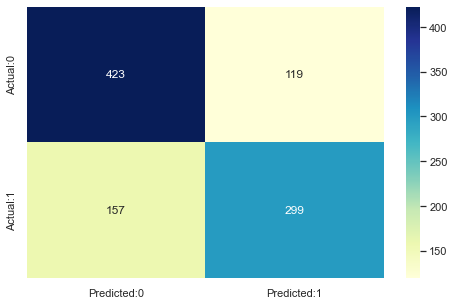

In [50]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [51]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       542
           1       0.72      0.66      0.68       456

    accuracy                           0.72       998
   macro avg       0.72      0.72      0.72       998
weighted avg       0.72      0.72      0.72       998



### Support Vector Machine

In [52]:
from sklearn.svm import SVC



#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [53]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [54]:
# predictions
svm_predict = svm_clf.predict(X_test)


#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 89.58%


<AxesSubplot:>

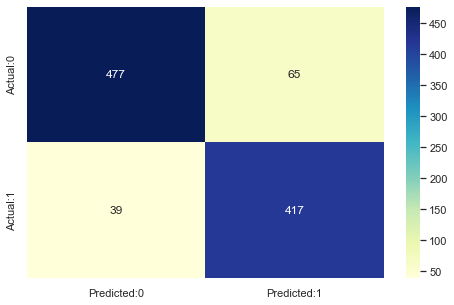

In [55]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [56]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       542
           1       0.87      0.91      0.89       456

    accuracy                           0.90       998
   macro avg       0.89      0.90      0.90       998
weighted avg       0.90      0.90      0.90       998



## Model Comparison

In [57]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy*100},
    "K-nearest neighbours":{'Accuracy':knn_accuracy*100},
    "Decision trees":{'Accuracy':tree_accuracy*100},
    "Support vector machine":{'Accuracy':svm_accuracy*100}
    }).T
comparison

,Accuracy
Logistic regression,68.136273
K-nearest neighbours,84.669339
Decision trees,72.344689
Support vector machine,89.579158


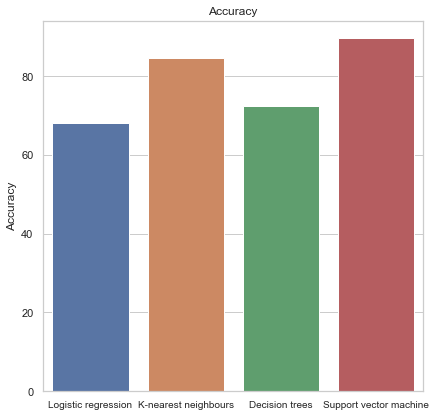

In [58]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()